In [66]:
import numpy as np
import pandas as pd

In [67]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [68]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [69]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### 1. 观察数据

In [70]:
# 两数据有重复信息title,删除其中一个数据的列
del credits['title']
credits.head()

,movie_id,cast,crew
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [71]:
data = pd.merge(movies,credits,left_on='id',right_on='movie_id')
print(data.shape)
data.head()

(4803, 23)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [72]:
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [73]:
# 删除一些没有明显价值的列
print('删除前的列数{}'.format(len(data.columns)))
data.drop(['homepage','original_title','overview','spoken_languages',
           'status','tagline','movie_id'],axis=1,inplace=True)
print('删除后的列数{}'.format(len(data.columns)))

删除前的列数23
删除后的列数16


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   popularity            4803 non-null   float64
 6   production_companies  4803 non-null   object 
 7   production_countries  4803 non-null   object 
 8   release_date          4802 non-null   object 
 9   revenue               4803 non-null   int64  
 10  runtime               4801 non-null   float64
 11  title                 4803 non-null   object 
 12  vote_average          4803 non-null   float64
 13  vote_count            4803 non-null   int64  
 14  cast                  4803 non-null   object 
 15  crew                 

In [75]:
# 查看缺失数据
data.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64

- 发现上映时间和影片时长分别有1个和2个缺失值

#### 定位缺失值位置,查看数据并填充缺失值

In [76]:
# 定位上映时间为空的数据位置
data.loc[data['release_date'].isnull()==True]

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
4553,0,[],380097,[],en,0.0,[],[],NaN,0,0.0,America Is Still the Place,0.0,0,[],[]


In [77]:
# google查询该电影上映时间是2015-03-01
data.iloc[4553,8]='2015-03-01'
data.isnull().sum()
# data['release_date'].fillna('2015-03-01')

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 2
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64

In [78]:
# 定位电影时长为空值的数据
data.loc[data['runtime'].isnull() == True]

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,"To Be Frank, Sinatra at 100",0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."


In [79]:
# Chiamatemi Francesco - Il Papa della gente 113
# To Be Frank, Sinatra at 100 81
data.iloc[2656,10]=113
data.iloc[4140,10]=81
data.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64

### 2. 数据清洗

#### 2.1 把上映日期转换为时间格式

In [80]:
data['release_date'] = pd.to_datetime(data['release_date'],format='%Y-%m-%d', errors='coerce')
data.isnull().any()

budget                  False
genres                  False
id                      False
keywords                False
original_language       False
popularity              False
production_companies    False
production_countries    False
release_date            False
revenue                 False
runtime                 False
title                   False
vote_average            False
vote_count              False
cast                    False
crew                    False
dtype: bool

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   id                    4803 non-null   int64         
 3   keywords              4803 non-null   object        
 4   original_language     4803 non-null   object        
 5   popularity            4803 non-null   float64       
 6   production_companies  4803 non-null   object        
 7   production_countries  4803 non-null   object        
 8   release_date          4803 non-null   datetime64[ns]
 9   revenue               4803 non-null   int64         
 10  runtime               4803 non-null   float64       
 11  title                 4803 non-null   object        
 12  vote_average          4803 non-null   float64       
 13  vote_count        

#### 2.2 处理json数据

- genres,keywords,production_companies,production_countries,cast,crew列为json类型

In [82]:
data['genres'].values

array(['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]',
       '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]',
       '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]',
       ...,
       '[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}, {"id": 10770, "name": "TV Movie"}]',
       '[]', '[{"id": 99, "name": "Documentary"}]'], dtype=object)

- 可以看到每个数据里面是多个字符串,每个字符串里面是一个列表,列表里的结构是字典.我们需要导入json包来处理

In [83]:
import json
# 转换为json格式之后genres列数据变成了列表(注意,原数据并没有更改)
data['genres'].apply(json.loads)

0       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
1       [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
3       [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
                              ...                        
4798    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4799    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
4800    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4801                                                   []
4802                  [{'id': 99, 'name': 'Documentary'}]
Name: genres, Length: 4803, dtype: object

- 处理后数据变成了内层为字典的列表,我们现在想把name对应的值拿到,并用'|'隔开

In [84]:
# 查看一下原数据
data['genres'].values

array(['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]',
       '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]',
       '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]',
       ...,
       '[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}, {"id": 10770, "name": "TV Movie"}]',
       '[]', '[{"id": 99, "name": "Documentary"}]'], dtype=object)

In [85]:
# 在原数据上更改
data['genres'] = data['genres'].apply(json.loads)
data['genres'].values

array([list([{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]),
       list([{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}]),
       list([{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 80, 'name': 'Crime'}]),
       ...,
       list([{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}, {'id': 10770, 'name': 'TV Movie'}]),
       list([]), list([{'id': 99, 'name': 'Documentary'}])], dtype=object)

#### 2.3 提取name对应的值,对genres列来说就是提取每个电影的类型(一个电影可能对应多个类型,比如泰坦尼克号可能对应爱情,灾难两个类型)

In [86]:
# 定义一个获取name的函数,name之间用竖线隔开
def getname(x):
    list = []
    for i in x:
        list.append(i['name'])
    return '|'.join(list)

In [87]:
# 对genres列应用上述获取name的函数
data['genres'] = data['genres'].apply(getname)
data.head()

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
0,237000000,Action|Adventure|Fantasy|Science Fiction,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,Adventure|Fantasy|Action,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,Action|Adventure|Crime,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,Action|Crime|Drama|Thriller,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,Action|Adventure|Science Fiction,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


#### 2.4 提取keywords,production_companies,production_countries的name值

In [88]:
json_column = ['keywords','production_companies','production_countries','cast','crew']
for col in json_column:
    data[col] = data[col].apply(json.loads)
for col in json_column[:3]:
    data[col] = data[col].apply(getname)
    
data.head()

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
0,237000000,Action|Adventure|Fantasy|Science Fiction,19995,culture clash|future|space war|space colony|so...,en,150.437577,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,Adventure|Fantasy|Action,285,ocean|drug abuse|exotic island|east india trad...,en,139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,United States of America,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,Action|Adventure|Crime,206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,107.376788,Columbia Pictures|Danjaq|B24,United Kingdom|United States of America,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,Action|Crime|Drama|Thriller,49026,dc comics|crime fighter|terrorist|secret ident...,en,112.312950,Legendary Pictures|Warner Bros.|DC Entertainme...,United States of America,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,Action|Adventure|Science Fiction,49529,based on novel|mars|medallion|space travel|pri...,en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


#### 2.5 定义提取主演的函数,并对cast列应用(主演用竖线隔开)

In [89]:
def getcharacter(x):
    l = []
    for i in x:
        l.append(i['character'])
    return '|'.join(l)

data['cast'] = data['cast'].apply(getcharacter)
data.head()

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
0,237000000,Action|Adventure|Fantasy|Science Fiction,19995,culture clash|future|space war|space colony|so...,en,150.437577,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,2009-12-10,2787965087,162.0,Avatar,7.2,11800,Jake Sully|Neytiri|Dr. Grace Augustine|Col. Qu...,"[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,Adventure|Fantasy|Action,285,ocean|drug abuse|exotic island|east india trad...,en,139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,United States of America,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Captain Jack Sparrow|Will Turner|Elizabeth Swa...,"[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,Action|Adventure|Crime,206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,107.376788,Columbia Pictures|Danjaq|B24,United Kingdom|United States of America,2015-10-26,880674609,148.0,Spectre,6.3,4466,James Bond|Blofeld|Madeleine|M|Lucia|Q|Moneype...,"[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,Action|Crime|Drama|Thriller,49026,dc comics|crime fighter|terrorist|secret ident...,en,112.312950,Legendary Pictures|Warner Bros.|DC Entertainme...,United States of America,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,Bruce Wayne / Batman|Alfred Pennyworth|James G...,"[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,Action|Adventure|Science Fiction,49529,based on novel|mars|medallion|space travel|pri...,en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,John Carter,6.1,2124,John Carter|Dejah Thoris|Sola|Tars Tarkas|Tal ...,"[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


#### 2.6 定义提取导演的函数,并对crew列应用(导演用竖线隔开)

In [90]:
data['crew'].values

array([list([{'credit_id': '52fe48009251416c750aca23', 'department': 'Editing', 'gender': 0, 'id': 1721, 'job': 'Editor', 'name': 'Stephen E. Rivkin'}, {'credit_id': '539c47ecc3a36810e3001f87', 'department': 'Art', 'gender': 2, 'id': 496, 'job': 'Production Design', 'name': 'Rick Carter'}, {'credit_id': '54491c89c3a3680fb4001cf7', 'department': 'Sound', 'gender': 0, 'id': 900, 'job': 'Sound Designer', 'name': 'Christopher Boyes'}, {'credit_id': '54491cb70e0a267480001bd0', 'department': 'Sound', 'gender': 0, 'id': 900, 'job': 'Supervising Sound Editor', 'name': 'Christopher Boyes'}, {'credit_id': '539c4a4cc3a36810c9002101', 'department': 'Production', 'gender': 1, 'id': 1262, 'job': 'Casting', 'name': 'Mali Finn'}, {'credit_id': '5544ee3b925141499f0008fc', 'department': 'Sound', 'gender': 2, 'id': 1729, 'job': 'Original Music Composer', 'name': 'James Horner'}, {'credit_id': '52fe48009251416c750ac9c3', 'department': 'Directing', 'gender': 2, 'id': 2710, 'job': 'Director', 'name': 'James

**data['crew']里面是类似下面这样的数据,我们需要找到job为Director的数据**

{'credit_id': '52fe48009251416c750aca23', 'department': 'Editing', 'gender': 0, 'id': 1721, 'job': 'Editor', 'name': 'Stephen E. Rivkin'}, 

{'credit_id': '539c47ecc3a36810e3001f87', 'department': 'Art', 'gender': 2, 'id': 496, 'job': 'Production Design', 'name': 'Rick Carter'}, 

{'credit_id': '54491c89c3a3680fb4001cf7', 'department': 'Sound', 'gender': 0, 'id': 900, 'job': 'Sound Designer', 'name': 'Christopher Boyes'}, 

{'credit_id': '54491cb70e0a267480001bd0', 'department': 'Sound', 'gender': 0, 'id': 900, 'job': 'Supervising Sound Editor', 'name': 'Christopher Boyes'}

In [91]:
def getdirector(x):
    l=[]
    for i in x:
        if i['job']=='Director':
            l.append(i['name'])
    return "|".join(l)
data['crew'] = data['crew'].apply(getdirector)
data.head()

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,cast,crew
0,237000000,Action|Adventure|Fantasy|Science Fiction,19995,culture clash|future|space war|space colony|so...,en,150.437577,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,2009-12-10,2787965087,162.0,Avatar,7.2,11800,Jake Sully|Neytiri|Dr. Grace Augustine|Col. Qu...,James Cameron
1,300000000,Adventure|Fantasy|Action,285,ocean|drug abuse|exotic island|east india trad...,en,139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,United States of America,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Captain Jack Sparrow|Will Turner|Elizabeth Swa...,Gore Verbinski
2,245000000,Action|Adventure|Crime,206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,107.376788,Columbia Pictures|Danjaq|B24,United Kingdom|United States of America,2015-10-26,880674609,148.0,Spectre,6.3,4466,James Bond|Blofeld|Madeleine|M|Lucia|Q|Moneype...,Sam Mendes
3,250000000,Action|Crime|Drama|Thriller,49026,dc comics|crime fighter|terrorist|secret ident...,en,112.312950,Legendary Pictures|Warner Bros.|DC Entertainme...,United States of America,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,Bruce Wayne / Batman|Alfred Pennyworth|James G...,Christopher Nolan
4,260000000,Action|Adventure|Science Fiction,49529,based on novel|mars|medallion|space travel|pri...,en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,John Carter,6.1,2124,John Carter|Dejah Thoris|Sola|Tars Tarkas|Tal ...,Andrew Stanton


#### 2.6 列重命名,release_date->date,cast->actor,crew->director

In [92]:
rename_dict = {'release_date':'date','cast':'actor','crew':'director'}
data.rename(columns=rename_dict, inplace=True)
data.head()

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,date,revenue,runtime,title,vote_average,vote_count,actor,director
0,237000000,Action|Adventure|Fantasy|Science Fiction,19995,culture clash|future|space war|space colony|so...,en,150.437577,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,2009-12-10,2787965087,162.0,Avatar,7.2,11800,Jake Sully|Neytiri|Dr. Grace Augustine|Col. Qu...,James Cameron
1,300000000,Adventure|Fantasy|Action,285,ocean|drug abuse|exotic island|east india trad...,en,139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,United States of America,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Captain Jack Sparrow|Will Turner|Elizabeth Swa...,Gore Verbinski
2,245000000,Action|Adventure|Crime,206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,107.376788,Columbia Pictures|Danjaq|B24,United Kingdom|United States of America,2015-10-26,880674609,148.0,Spectre,6.3,4466,James Bond|Blofeld|Madeleine|M|Lucia|Q|Moneype...,Sam Mendes
3,250000000,Action|Crime|Drama|Thriller,49026,dc comics|crime fighter|terrorist|secret ident...,en,112.312950,Legendary Pictures|Warner Bros.|DC Entertainme...,United States of America,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,Bruce Wayne / Batman|Alfred Pennyworth|James G...,Christopher Nolan
4,260000000,Action|Adventure|Science Fiction,49529,based on novel|mars|medallion|space travel|pri...,en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,John Carter,6.1,2124,John Carter|Dejah Thoris|Sola|Tars Tarkas|Tal ...,Andrew Stanton


####

#### 一部电影可归为多种类型，先统计一下各种类型出现的次数

In [93]:
# data.to_csv('泰坦尼克号_老师.csv')

In [94]:
# def countn(columns):
#     dict1 = {}
#     for i in data[columns]:
#         for j in i.split("|"):
#             if j not in dict1:
#                 dict1[j] = 1
#             else:
#                 dict1[j] += 1
#     # print(dict1)
#     return dict1


# row = []
# col = []
# for k,v in countn('genres').items():
#     if k != "":
#         row.append(k)
#         col.append(v)
# r = pd.DataFrame(row)
# c = pd.DataFrame(col)
# r['count'] = c
# r.index = row

In [95]:
# r.sort_values(by = ['count'],ascending = False).plot(kind = 'barh')

In [96]:
def countn(columns):
    count = dict()
    for row in columns:
        row = row.split("|")
        for i in row:
            if i in count:
                count[i] += 1
            else:
                count[i] = 1
    return count

In [98]:
countn(data.genres)

{'Action': 1154,
 'Adventure': 790,
 'Fantasy': 424,
 'Science Fiction': 535,
 'Crime': 696,
 'Drama': 2297,
 'Thriller': 1274,
 'Animation': 234,
 'Family': 513,
 'Western': 82,
 'Comedy': 1722,
 'Romance': 894,
 'Horror': 519,
 'Mystery': 348,
 'History': 197,
 'War': 144,
 'Music': 185,
 'Documentary': 110,
 'Foreign': 34,
 'TV Movie': 8,
 '': 28}

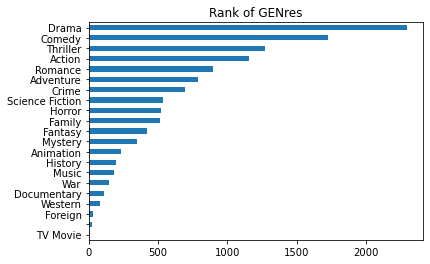

In [101]:
genres = pd.Series(countn(data.genres)).sort_values()
genres.plot(kind = 'barh',title = 'Rank of GENres')

In [102]:
data['genres'] = data['genres'].apply(lambda x:x.split("|"))
data.head()

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,date,revenue,runtime,title,vote_average,vote_count,actor,director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,culture clash|future|space war|space colony|so...,en,150.437577,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,2009-12-10,2787965087,162.0,Avatar,7.2,11800,Jake Sully|Neytiri|Dr. Grace Augustine|Col. Qu...,James Cameron
1,300000000,"[Adventure, Fantasy, Action]",285,ocean|drug abuse|exotic island|east india trad...,en,139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,United States of America,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Captain Jack Sparrow|Will Turner|Elizabeth Swa...,Gore Verbinski
2,245000000,"[Action, Adventure, Crime]",206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,107.376788,Columbia Pictures|Danjaq|B24,United Kingdom|United States of America,2015-10-26,880674609,148.0,Spectre,6.3,4466,James Bond|Blofeld|Madeleine|M|Lucia|Q|Moneype...,Sam Mendes
3,250000000,"[Action, Crime, Drama, Thriller]",49026,dc comics|crime fighter|terrorist|secret ident...,en,112.312950,Legendary Pictures|Warner Bros.|DC Entertainme...,United States of America,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,Bruce Wayne / Batman|Alfred Pennyworth|James G...,Christopher Nolan
4,260000000,"[Action, Adventure, Science Fiction]",49529,based on novel|mars|medallion|space travel|pri...,en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,John Carter,6.1,2124,John Carter|Dejah Thoris|Sola|Tars Tarkas|Tal ...,Andrew Stanton


In [103]:
genres_agg = pd.DataFrame(0,index = genres.index,
                         columns = ['revenue','vote_average','budget'])
for i in range(len(data)):
    for g in data['genres'][i]:
        genres_agg.loc[g,'revenue'] += data['revenue'][i]
        genres_agg.loc[g,'budget'] += data['budget'][i]
        genres_agg.loc[g,'vote_average'] += data['vote_average'][i]
genres_agg.sort_values(by = ['revenue','vote_average','budget'],ascending = False)

,revenue,vote_average,budget
Adventure,164841561551,4864.0,52398220463
Action,162959914515,6911.9,59443406599
Comedy,122760517608,10238.3,43589711809
Drama,119710983984,14674.6,47498112157
Thriller,103250426269,7658.0,40727495424
Family,83283238689,3093.2,26019109625
Fantasy,81982199925,2585.0,26949696595
Science Fiction,81564235745,3213.0,27748069865
Romance,53642137545,5549.7,18158357743
Animation,52812167865,1483.9,15553021056


In [104]:
r.shape[0]

20

In [107]:
genres_avg = genres_agg.div(genres.values,axis = 0)
genres_avg

,revenue,vote_average,budget
TV Movie,0.000000e+00,5.662500,1.150000e+06
,5.974036e+04,2.335714,1.321429e+05
Foreign,3.646515e+05,6.352941,6.580884e+05
Western,4.624596e+07,6.178049,2.707870e+07
Documentary,9.838888e+06,6.238182,2.653288e+06
War,8.415587e+07,6.713889,3.528246e+07
Music,4.845595e+07,6.355676,1.590795e+07
History,5.752356e+07,6.719797,2.990347e+07
Animation,2.256930e+08,6.341453,6.646590e+07
Mystery,7.830093e+07,6.183908,3.074449e+07


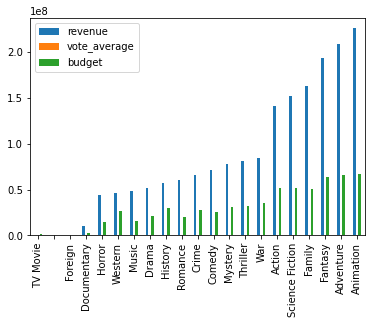

In [108]:
genres_avg.sort_values(by=['revenue']).plot(kind = 'bar')

In [109]:
# 动画片,冒险,奇幻,收入比较高

In [114]:
genres_avg['roi'] = (genres_avg['revenue']-genres_avg['budget'])/genres_avg['budget']
genres_avg

,revenue,vote_average,budget,roi
TV Movie,0.000000e+00,5.662500,1.150000e+06,-1.000000
,5.974036e+04,2.335714,1.321429e+05,-0.547911
Foreign,3.646515e+05,6.352941,6.580884e+05,-0.445893
Western,4.624596e+07,6.178049,2.707870e+07,0.707835
Documentary,9.838888e+06,6.238182,2.653288e+06,2.708186
War,8.415587e+07,6.713889,3.528246e+07,1.385204
Music,4.845595e+07,6.355676,1.590795e+07,2.046022
History,5.752356e+07,6.719797,2.990347e+07,0.923642
Animation,2.256930e+08,6.341453,6.646590e+07,2.395621
Mystery,7.830093e+07,6.183908,3.074449e+07,1.546828


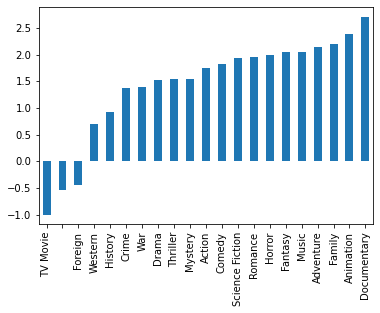

In [115]:
genres_avg['roi'].sort_values().plot(kind = 'bar')

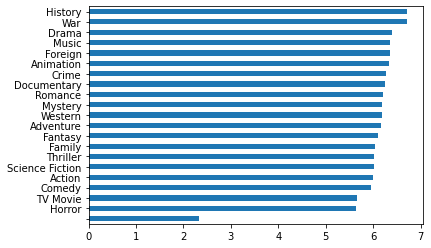

In [116]:
genres_avg['vote_average'].sort_values().plot(kind = 'barh')

In [117]:
data.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'date', 'revenue',
       'runtime', 'title', 'vote_average', 'vote_count', 'actor', 'director'],
      dtype='object')

In [118]:
data['director'].value_counts()

                        30
Steven Spielberg        26
Woody Allen             21
Martin Scorsese         20
Clint Eastwood          20
                        ..
Scott Marshall Smith     1
Alison Maclean           1
John Patrick Shanley     1
Phil Claydon             1
Kat Coiro                1
Name: director, Length: 2417, dtype: int64

# 影片一共有20种类型,其中剧情,喜剧,惊悚,动作,冒险,类型最大,西部和记录最少

In [235]:
# # 定义一个函数，数出来genres列各种类型的电影各出现了多少次
# def countN(column):
    
#     return count

In [236]:
# countN(data.genres)

#### 对上述结果进行绘图

- 影片有18种类型，剧情、喜剧、惊悚、动作、冒险这5种类型的影片最多，西部片和纪录片最少

In [237]:
data['genres'] = data['genres'].apply(lambda x:x.split("|"))

In [238]:
data.head()

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,date,revenue,runtime,title,vote_average,vote_count,actor,director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,culture clash|future|space war|space colony|so...,en,150.437577,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,2009-12-10,2787965087,162.0,Avatar,7.2,11800,Jake Sully|Neytiri|Dr. Grace Augustine|Col. Qu...,James Cameron
1,300000000,"[Adventure, Fantasy, Action]",285,ocean|drug abuse|exotic island|east india trad...,en,139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,United States of America,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Captain Jack Sparrow|Will Turner|Elizabeth Swa...,Gore Verbinski
2,245000000,"[Action, Adventure, Crime]",206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,107.376788,Columbia Pictures|Danjaq|B24,United Kingdom|United States of America,2015-10-26,880674609,148.0,Spectre,6.3,4466,James Bond|Blofeld|Madeleine|M|Lucia|Q|Moneype...,Sam Mendes
3,250000000,"[Action, Crime, Drama, Thriller]",49026,dc comics|crime fighter|terrorist|secret ident...,en,112.312950,Legendary Pictures|Warner Bros.|DC Entertainme...,United States of America,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,Bruce Wayne / Batman|Alfred Pennyworth|James G...,Christopher Nolan
4,260000000,"[Action, Adventure, Science Fiction]",49529,based on novel|mars|medallion|space travel|pri...,en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,John Carter,6.1,2124,John Carter|Dejah Thoris|Sola|Tars Tarkas|Tal ...,Andrew Stanton


In [239]:
# 把影片类型列变成列表

data.head()

,budget,genres,id,keywords,original_language,popularity,production_companies,production_countries,date,revenue,runtime,title,vote_average,vote_count,actor,director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,culture clash|future|space war|space colony|so...,en,150.437577,Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,2009-12-10,2787965087,162.0,Avatar,7.2,11800,Jake Sully|Neytiri|Dr. Grace Augustine|Col. Qu...,James Cameron
1,300000000,"[Adventure, Fantasy, Action]",285,ocean|drug abuse|exotic island|east india trad...,en,139.082615,Walt Disney Pictures|Jerry Bruckheimer Films|S...,United States of America,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Captain Jack Sparrow|Will Turner|Elizabeth Swa...,Gore Verbinski
2,245000000,"[Action, Adventure, Crime]",206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,107.376788,Columbia Pictures|Danjaq|B24,United Kingdom|United States of America,2015-10-26,880674609,148.0,Spectre,6.3,4466,James Bond|Blofeld|Madeleine|M|Lucia|Q|Moneype...,Sam Mendes
3,250000000,"[Action, Crime, Drama, Thriller]",49026,dc comics|crime fighter|terrorist|secret ident...,en,112.312950,Legendary Pictures|Warner Bros.|DC Entertainme...,United States of America,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,Bruce Wayne / Batman|Alfred Pennyworth|James G...,Christopher Nolan
4,260000000,"[Action, Adventure, Science Fiction]",49529,based on novel|mars|medallion|space travel|pri...,en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,John Carter,6.1,2124,John Carter|Dejah Thoris|Sola|Tars Tarkas|Tal ...,Andrew Stanton


#### 计算每种影片的预算，票房以及评分

In [240]:
r

,0,count
Action,Action,1154
Adventure,Adventure,790
Fantasy,Fantasy,424
Science Fiction,Science Fiction,535
Crime,Crime,696
Drama,Drama,2297
Thriller,Thriller,1274
Animation,Animation,234
Family,Family,513
Western,Western,82


In [266]:
def ct(col):
    dict2 = {}
    for i in row:
    #     print(i)
        for j in data['genres']:
    #         print(j)
            for v in j:
    #             print(v)
                if i == v:
                    if v not in dict2:
                        dict2[v] = data[col][0]
                    else:
                        dict2[v] += data[col][0]
                    break
    #         break
    #     break
    return dict2

print("--------------------------------")
print(ct('revenue'))

c = []
for v in dict2.values():
    c.append(v)
c
cc = pd.DataFrame(c)
cc
r['revenue'] = c

--------------------------------
{'Action': 3217311710398, 'Adventure': 2202492418730, 'Fantasy': 1182097196888, 'Science Fiction': 1491561321545, 'Crime': 1940423700552, 'Drama': 6403955804839, 'Thriller': 3551867520838, 'Animation': 652383830358, 'Family': 1430226089631, 'Western': 228613137134, 'Comedy': 4800875879814, 'Romance': 2492440787778, 'Horror': 1446953880153, 'Mystery': 970211850276, 'History': 549229122139, 'War': 401466972528, 'Music': 515773541095, 'Documentary': 306676159570, 'Foreign': 94790812958, 'TV Movie': 22303720696}


In [267]:
dict2

{'Action': 3217311710398,
 'Adventure': 2202492418730,
 'Fantasy': 1182097196888,
 'Science Fiction': 1491561321545,
 'Crime': 1940423700552,
 'Drama': 6403955804839,
 'Thriller': 3551867520838,
 'Animation': 652383830358,
 'Family': 1430226089631,
 'Western': 228613137134,
 'Comedy': 4800875879814,
 'Romance': 2492440787778,
 'Horror': 1446953880153,
 'Mystery': 970211850276,
 'History': 549229122139,
 'War': 401466972528,
 'Music': 515773541095,
 'Documentary': 306676159570,
 'Foreign': 94790812958,
 'TV Movie': 22303720696}

In [270]:
print(ct('vote_average'))

c = []
for v in dict2.values():
    c.append(v)
c
cc = pd.DataFrame(c)
cc
r['vote_average'] = c

{'Action': 8308.799999999866, 'Adventure': 5687.999999999917, 'Fantasy': 3052.799999999984, 'Science Fiction': 3851.9999999999636, 'Crime': 5011.199999999934, 'Drama': 16538.400000000696, 'Thriller': 9172.799999999954, 'Animation': 1684.8000000000068, 'Family': 3693.5999999999676, 'Western': 590.3999999999999, 'Comedy': 12398.40000000028, 'Romance': 6436.799999999898, 'Horror': 3736.7999999999665, 'Mystery': 2505.5999999999976, 'History': 1418.400000000005, 'War': 1036.8000000000027, 'Music': 1332.0000000000045, 'Documentary': 792.0000000000011, 'Foreign': 244.79999999999984, 'TV Movie': 57.60000000000001}


In [271]:
r

,0,count,revenue,vote_average
Action,Action,1154,3217311710398,3217311710398
Adventure,Adventure,790,2202492418730,2202492418730
Fantasy,Fantasy,424,1182097196888,1182097196888
Science Fiction,Science Fiction,535,1491561321545,1491561321545
Crime,Crime,696,1940423700552,1940423700552
Drama,Drama,2297,6403955804839,6403955804839
Thriller,Thriller,1274,3551867520838,3551867520838
Animation,Animation,234,652383830358,652383830358
Family,Family,513,1430226089631,1430226089631
Western,Western,82,228613137134,228613137134


In [272]:
print(ct('budget'))

c = []
for v in dict2.values():
    c.append(v)
c
cc = pd.DataFrame(c)
cc
r['budget'] = c

{'Action': 273498000000, 'Adventure': 187230000000, 'Fantasy': 100488000000, 'Science Fiction': 126795000000, 'Crime': 164952000000, 'Drama': 544389000000, 'Thriller': 301938000000, 'Animation': 55458000000, 'Family': 121581000000, 'Western': 19434000000, 'Comedy': 408114000000, 'Romance': 211878000000, 'Horror': 123003000000, 'Mystery': 82476000000, 'History': 46689000000, 'War': 34128000000, 'Music': 43845000000, 'Documentary': 26070000000, 'Foreign': 8058000000, 'TV Movie': 1896000000}


In [273]:
# r['revenue'] = c
# r['vote_average'] = 0
# r['budget'] = 0

In [278]:
r

,0,count,revenue,vote_average,budget
Action,Action,1154,3217311710398,3217311710398,3217311710398
Adventure,Adventure,790,2202492418730,2202492418730,2202492418730
Fantasy,Fantasy,424,1182097196888,1182097196888,1182097196888
Science Fiction,Science Fiction,535,1491561321545,1491561321545,1491561321545
Crime,Crime,696,1940423700552,1940423700552,1940423700552
Drama,Drama,2297,6403955804839,6403955804839,6403955804839
Thriller,Thriller,1274,3551867520838,3551867520838,3551867520838
Animation,Animation,234,652383830358,652383830358,652383830358
Family,Family,513,1430226089631,1430226089631,1430226089631
Western,Western,82,228613137134,228613137134,228613137134


In [218]:
# # 构造一个数据框，存放各个类型电影的总票房，总评分，总预算
# genres_agg = pd.DataFrame(0,index=genres.index,
#                           columns=['revenue','vote_average','budget'])
# # 遍历所有的数据
# for i in range(len(data)):
#     # 遍历每一行
#     for g in data['genres'][i]:
#         genres_agg.loc[g,'revenue'] =
#         genres_agg.loc[g,'budget'] =
#         genres_agg.loc[g,'vote_average'] = 
# genres_agg.sort_values()

,revenue,vote_average,budget
Adventure,137227546809,3023.2,44789971433
Action,136612118135,4177.7,49971109015
Comedy,102552791057,5149.1,35168048483
Drama,98537407724,7014.7,37880697655
Thriller,87162373777,4593.2,34399652931
Family,71803389490,1816.5,22772154783
Fantasy,70231198384,1586.9,22522750411
Science Fiction,67991361749,1937.0,23978507534
Animation,48501399538,1075.0,14505894383
Romance,44078895436,2664.5,14256864201


genres

,0,count,revenue,vote_average,budget
Action,Action,1154,3217311710398,3217311710398,3217311710398
Adventure,Adventure,790,2202492418730,2202492418730,2202492418730
Fantasy,Fantasy,424,1182097196888,1182097196888,1182097196888
Science Fiction,Science Fiction,535,1491561321545,1491561321545,1491561321545
Crime,Crime,696,1940423700552,1940423700552,1940423700552
Drama,Drama,2297,6403955804839,6403955804839,6403955804839
Thriller,Thriller,1274,3551867520838,3551867520838,3551867520838
Animation,Animation,234,652383830358,652383830358,652383830358
Family,Family,513,1430226089631,1430226089631,1430226089631
Western,Western,82,228613137134,228613137134,228613137134


In [226]:
# 求每类电影的平均票房，得分，预算 使用dataframe.div(xx,axis=0)


,revenue,vote_average,budget
Documentary,5.081105e+07,6.750000,7.629062e+06
Western,1.076390e+08,6.483333,6.908333e+07
Music,1.013821e+08,6.464179,3.116060e+07
War,1.209907e+08,6.747222,5.558389e+07
History,1.049629e+08,6.733721,5.096235e+07
Animation,2.921771e+08,6.475904,8.738491e+07
Mystery,1.091536e+08,6.351818,4.283269e+07
Horror,7.291373e+07,5.730126,2.474223e+07
Fantasy,2.722139e+08,6.150775,8.729748e+07
Family,2.434013e+08,6.157627,7.719375e+07


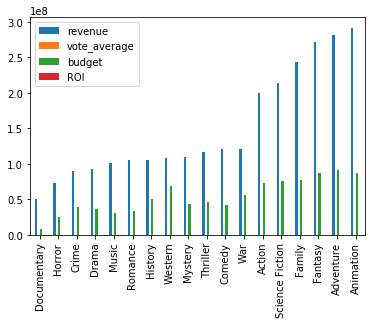

In [230]:
# 画图


In [228]:
# 计算每类电影的平均投资收益比


,revenue,vote_average,budget,ROI
Documentary,5.081105e+07,6.750000,7.629062e+06,5.660195
Western,1.076390e+08,6.483333,6.908333e+07,0.558103
Music,1.013821e+08,6.464179,3.116060e+07,2.253535
War,1.209907e+08,6.747222,5.558389e+07,1.176722
History,1.049629e+08,6.733721,5.096235e+07,1.059616
Animation,2.921771e+08,6.475904,8.738491e+07,2.343565
Mystery,1.091536e+08,6.351818,4.283269e+07,1.548372
Horror,7.291373e+07,5.730126,2.474223e+07,1.946934
Fantasy,2.722139e+08,6.150775,8.729748e+07,2.118234
Family,2.434013e+08,6.157627,7.719375e+07,2.153122


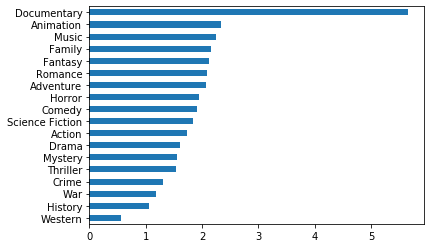

In [231]:
# 平均投资回报率排名


- 票房最高的影片类型是：动画、奇幻和冒险，其次是家庭、科幻和动作，它们比其余类型影片的票房高了一大截，当然它们的预算也相对较高。
- 票房高的影片类型，其投资回报率也是不错的。
- 投资回报率最高的是较为小众的纪录片，如果预算有限又想获得高收益，纪录片不失为一个好选择。
- 西部片、历史片和战争片的投资回报率垫底，拍摄此类影片需谨慎。

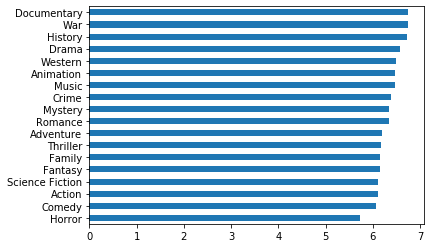

In [234]:
# 不同类型电影的平均评分


- 不同类型影片的评分差距较小，极差约为1分。
- 纪录片、历史片和战争片的评分位列前三。动作片、喜剧片和恐怖片的评分位列倒数前三。